# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [4]:
sample_mean = np.mean(df.temperature)
sample_std = np.std(df.temperature)
print('Sample mean = '+str(np.round(sample_mean,3)) + ' degrees F')
print('Sample std dev = '+str(np.round(sample_std,3))+ ' degrees F')

Sample mean = 98.249 degrees F
Sample std dev = 0.73 degrees F


# 1. Is the distribution of body temperatures normal?

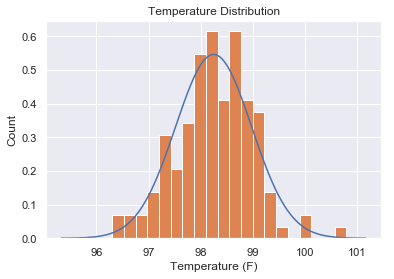

In [5]:
sns.set()
x = np.linspace(sample_mean-4*sample_std,sample_mean+4*sample_std, 4000)
y = stats.norm.pdf(x,sample_mean,sample_std)
_ = plt.plot(x, y)
_ = plt.hist(df.temperature, bins=20, density=True)
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('Count')
_ = plt.title('Temperature Distribution')

From the above histogram, the distribution of body temperatures appears to be normal.

In [6]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


The mean and median do not have much of a difference (98.25 and 98.30 resp), and therefore indicate that this is a normal distribution.

Next let's plot an ECDF graph for the data.

In [7]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

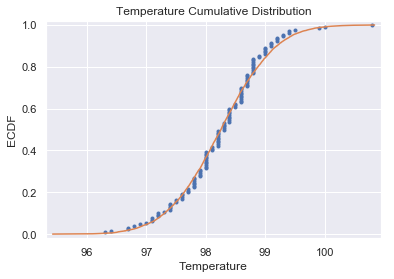

In [8]:
# Compute ECDF for data: x, y
x, y = ecdf(df.temperature)

# Generate plot
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)

# Label the axes
plt.ylabel('ECDF')
plt.xlabel('Temperature')
plt.title('Temperature Cumulative Distribution')

#Compare with normal distribution of data
samples = np.random.normal(sample_mean, sample_std, size=10000)
x_sample, y_sample = ecdf(samples)
plt.plot(x_sample, y_sample)

# Display the plot
plt.show()


The graph above again indicates that the data is normally distributed.

The Shapiro–Wilk test is another way of testing normality in frequentist statistics. It tests the null hypothesis that the data was drawn from a normal distribution.

In [9]:
sh_val, p = stats.shapiro(df.temperature)
print('Test Statistic = ',sh_val)
print('The p-value for the hypothesis test = ', p)      

Test Statistic =  0.9865769743919373
The p-value for the hypothesis test =  0.2331680953502655


Since the p-value is much larger than .05, we fail to reject the null hypothesis that the sample came from a population with a normal distribution.

# 2. Is the sample size large? Are the observations independent?

The Central limit theorem states that if sample size are large enough, the distribution will be approximately normal. The general rule of n>=30 applies. Our sample size is 130 so it is fairly large. Also the body temperature of one person is independent of another so we can safely assume that the observations are independent. 130 is also well below 10% of the human population, so we can assume independence for the observations in this dataset.

# 3. Is the true population mean really 98.6 degrees F?

Let's try a bootstrap hypothesis test first. To set up this test, we will take the mean as our test statistic. 
Our null and alternative hypotheses can be stated as:
$H_0$:$\mu$ = 98.6 F
and
$H_1$:$\mu$ $\ne$ 98.6 F

In [10]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

In [11]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [12]:
# Function to Compute Confidence Interval
def confidence_Interval(percent, data):
    split_percent = (100-percent)/2
    return np.percentile(data,[split_percent, percent + split_percent])

Standard Error of the Mean:  0.06405661469519336
Standard deviation of bootstrap replicates:  0.06367827483390617


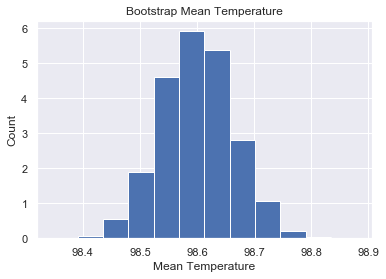

In [13]:
# shift the temperature distribution so that its mean is 98.6 deg F.
s_temp = df.temperature - sample_mean + 98.6

# create 10000 bootstrap replicates of the mean shifted temperature: bs_replicates
bs_replicates = draw_bs_reps(s_temp, np.mean, size=10000)

# Compute Standard Error of the Mean
std_err_mean = np.std(df.temperature) / np.sqrt(len(df.temperature))
print("Standard Error of the Mean: ", std_err_mean)

# Compute Standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print("Standard deviation of bootstrap replicates: ", bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=12, density=True)
_ = plt.xlabel('Mean Temperature')
_ = plt.ylabel('Count')
_ = plt.title('Bootstrap Mean Temperature')
plt.show()

In [14]:
#Find the probability of 98.6
p_val = np.sum(abs(bs_replicates - 98.6) >= abs(sample_mean - 98.6)) / len(bs_replicates)
print('p_val = ', p_val)

p_val =  0.0


The p-value of 0 indicates that none of the 10,000 replicates had a value at least as extreme as the original dataset's mean. This indicates that, assuming the null hypothesis is true, there is less than a 0.01% likelihood of obtaining a value as extreme or greater than the mean temperature in the dataset by chance. Hence, the null hypothesis is rejected, and the alternative hypothesis is accepted. This bootstrap hypothesis test indicates that the mean population temperature is different from 98.6 degrees F.

Now, let's try frequentist statistical testing. Since the standard deviation of the population is not known, we would use a one-sample test.

First let's do the z-test. Generally, z-tests are used when we have large sample sizes (n > 30), whereas t-tests are most helpful with a smaller sample size (n < 30). Both methods assume a normal distribution of the data, but the z-tests are most useful when the standard deviation is known.

In [15]:
#zscore function for means
def zscore_mean(statistic, parameter, size=1):
    zscore = (statistic - parameter.mean())/(parameter.std()/size**0.5)
    return zscore

#convert zscore to p-value
def pvalue(zscore):
    prob = 1 - stats.norm.cdf(zscore)
    return prob

In [16]:
zscore = zscore_mean(98.6, df.temperature, 130)
p = pvalue(zscore)
print('z-score: ', zscore)
print('p-value: ', p)

z-score:  5.454823292364079
p-value:  2.451078506826576e-08


The p-value is very close to 0 and hence the test indicates that the population mean temperature is different from 98.6 degrees F.

Next let's try the t-test.

In [17]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Again, since the p-value is less than our $\alpha$ of 0.05, we reject the null hypothesis and have evidence for the population mean being a value different than 98.6 degrees F.

# 4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

We will repeat the z-test and t-test on a sample of size 10 drawn at random with replacement from the dataset.

In [18]:
sample_10 = np.random.choice(df.temperature,size=10, replace=False)
sample_10

array([98.5, 97.6, 97.1, 98.3, 98. , 97.7, 97.9, 98.4, 97.8, 96.3])

In [19]:
#calculate the mean and sample variance
m_10 = np.mean(sample_10)
var_10 = np.var(sample_10, ddof=1)
print('Sample mean = ', m_10, 'and Sample variance = ', var_10)

Sample mean =  97.75999999999999 and Sample variance =  0.43600000000000255


In [20]:
zscore = zscore_mean(98.6, sample_10, 10)
p = pvalue(zscore)
print('z-score: ', zscore)
print('p-value: ', p)

z-score:  4.240477729707684
p-value:  1.1152228246102958e-05


In [21]:
stats.ttest_1samp(sample_10, 98.6)

Ttest_1sampResult(statistic=-4.02287039792884, pvalue=0.003005045573823265)

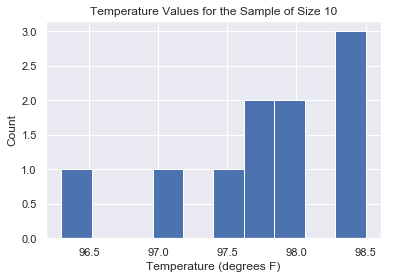

In [22]:
_ = plt.hist(sample_10)
_ = plt.xlabel('Temperature (degrees F)')
_ = plt.ylabel('Count')
_ = plt.title('Temperature Values for the Sample of Size 10')
plt.show()

# 5. At what temperature should we consider someone's temperature to be "abnormal"?

Let's first calculate the 95% and 99% Confidence Intervals using the Frequentist Method.

In [23]:
abnormal_temp1 = confidence_Interval(95, df.temperature)
print("Normal temps in range 95%:", abnormal_temp1)

Normal temps in range 95%: [96.7225 99.4775]


In [24]:
me1 = (abnormal_temp1[1] - abnormal_temp1[0]) / 2
print(me1)

1.3775000000000048


In [25]:
abnormal_temp2 = confidence_Interval(99, df.temperature)
print("Normal temps in range 99%:", abnormal_temp2)

Normal temps in range 99%: [ 96.3645 100.284 ]


In [26]:
me2 = (abnormal_temp2[1] - abnormal_temp2[0]) / 2
print(me2)

1.9597499999999997


Next let's calculate the same using BootStrap approach.

In [27]:
# create 10,000 bootstrap replicates of the mean
t_bs_reps = draw_bs_reps(df.temperature, np.mean, 10000)

# evaluate the 99% confidence interval
bs_reps_99ci = np.percentile(t_bs_reps, [0.5, 99.5])

# calculate the margin of error
bs_me = (bs_reps_99ci[1] - bs_reps_99ci[0]) / 2

print('The 99% confidence interval is (', bs_reps_99ci[0], ', ', bs_reps_99ci[1], ')')
print('The margin of error is', bs_me)

The 99% confidence interval is ( 98.09 ,  98.41307692307693 )
The margin of error is 0.16153846153846274


In [28]:
# evaluate the 95% confidence interval
bs_reps_95ci = np.percentile(t_bs_reps, [2.5, 97.5])

# calculate the margin of error
bs_me = (bs_reps_95ci[1] - bs_reps_95ci[0]) / 2

print('The 95% confidence interval is (', bs_reps_95ci[0], ', ', bs_reps_95ci[1], ')')
print('The margin of error is', bs_me)

The 95% confidence interval is ( 98.12538461538462 ,  98.37307692307692 )
The margin of error is 0.12384615384615216


These approaches indicate that a temperature below 98.1 degrees F or above 98.4 degrees F is abnormal.

# 6. Is there a significant difference between males and females in normal temperature?

In [29]:
male = df[df.gender == 'M'].temperature
female = df[df.gender == 'F'].temperature

In [30]:
male.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [31]:
female.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

The sample sizes for our sampling distribution of male and female body temperatures is 65 each. This number is large enough to apply the Central Limit Theorem.

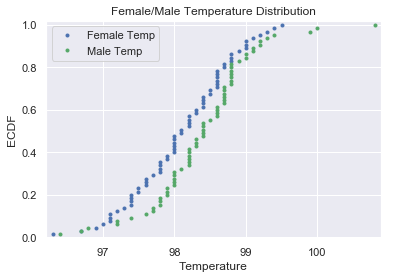

In [32]:
# Compute ECDF for male temperatures
x_f, y_f = ecdf(male)

# Generate plot
_ = plt.plot(x_f, y_f, marker='.', linestyle='none', color='b', label='Female Temp')

# Compute ECDF for female temperatures
x_m, y_m = ecdf(female)

# Generate plot
_ = plt.plot(x_m, y_m, marker='.', linestyle='none', color='g', label='Male Temp')

# Make the margins nice
_ = plt.margins(.02)

# Label the axes
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')
_ = plt.title('Female/Male Temperature Distribution')
_ = plt.legend()
plt.show()

From the above graph, it is evident that the distributions are pretty close and normal. Also females have a higher temperature on average. 

In [33]:
mean_diff = np.mean(female)-np.mean(male)
print("Difference in Mean Temp: ", mean_diff)
std_diff = np.sqrt((np.std(male)**2/len(male))+(np.std(female)**2/len(female)))
print("Difference in Std Deviation: ", std_diff)

Difference in Mean Temp:  0.289230769230727
Difference in Std Deviation:  0.12557668521231213


The difference in the mean temperatures between males and females is about 0.289 degrees.
Finally, we calculate the likelihood of getting a value as extreme as our difference of means, and compare that to our significance level $\alpha=0.05$.

In [34]:
p_value=(1-stats.norm.cdf(mean_diff,scale=std_diff))*2

print("If the true difference in means between male and female temperatures were 0, \
then an observed difference in sample means of 0.2892 would have a p-value of "+str(np.round(p_value,5))+".")

If the true difference in means between male and female temperatures were 0, then an observed difference in sample means of 0.2892 would have a p-value of 0.02127.


Since the p-value is smaller than our significance level, we will reject the null hypothesis that the mean body temperature is the same between men and women. On the contrary, it is statistically significant.

# Conclusion

This turned out to be a very interesting analysis of Human Body Temperatures. It suggests that Wunderlich's population mean of 98.6 that has been accepted for more than 120 years is not the true population mean. We used 3 different hypotheses tests to deduce this. The actual mean human body temperature is slightly lower, being centered at about 98.25 degrees Fahrenheit. According to the bootstrap confidence interval, there's a 95% chance that the true population mean for body temperature is between 98.124 and  98.375 degrees Fahrenheit.  

It's also likely that females and males have different normal temperatures, although more data analysis is needed for confirmation. The conditions of data collection here are unknown. Further analysis on this topic should be conducted after controlling these conditions for more accurate conclusions. Our analysis indicated that the mean body temperatures of men and women are statistically different.